# 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 데이터 확인

In [2]:
data = pd.read_csv('/content/data/train.csv')
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,2997,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,2998,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,2999,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


# 데이터의 구조와 형태 확인

In [3]:
print(data.shape)   #data의 구조
print(data.dtypes)  #data의 형태

(3000, 24)
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64

# 결측치 확인

In [4]:
data.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

# feature 분포 시각화

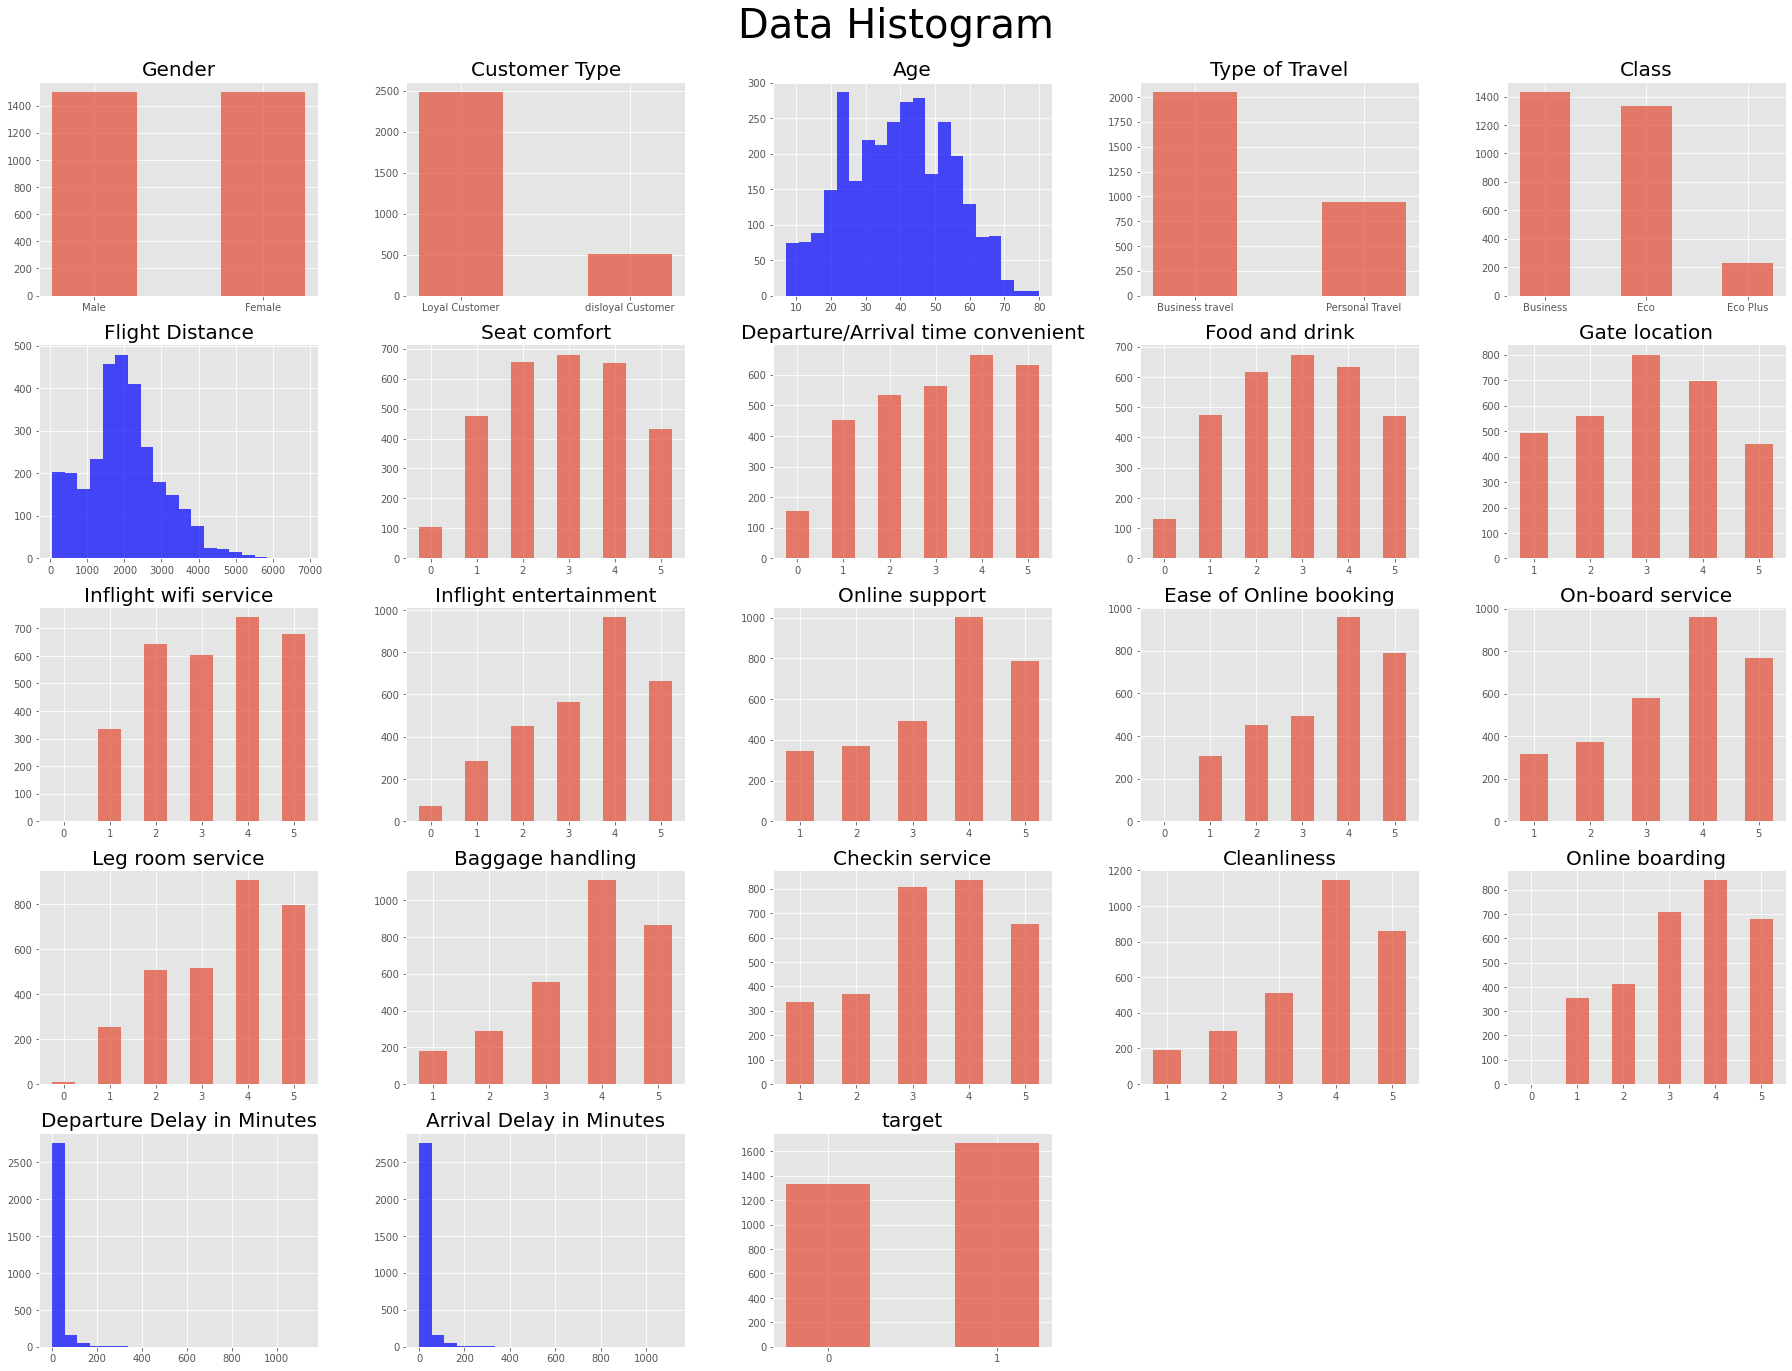

In [5]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20)) #히스토그램의 크기 설정
plt.suptitle("Data Histogram", fontsize=40) #대표 타이틀 설정

cols = data.columns[1:] #id는 제외하고 시각화합니다.
for i in range(len(cols)):
    plt.subplot(5,5,i+1)  #5X5크기로 배열
    plt.title(cols[i], fontsize=20)
    if len(data[cols[i]].unique()) > 20:
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)  #대상의 갯수가 20개가 넘을 경우 20개의 bin을 가지는 히스토그램으로 설정
    else:
        temp = data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7) #20개 이하일 경우 
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #여백 지정
plt.show()

# 범주형 데이터에 따른 target 분포 확인

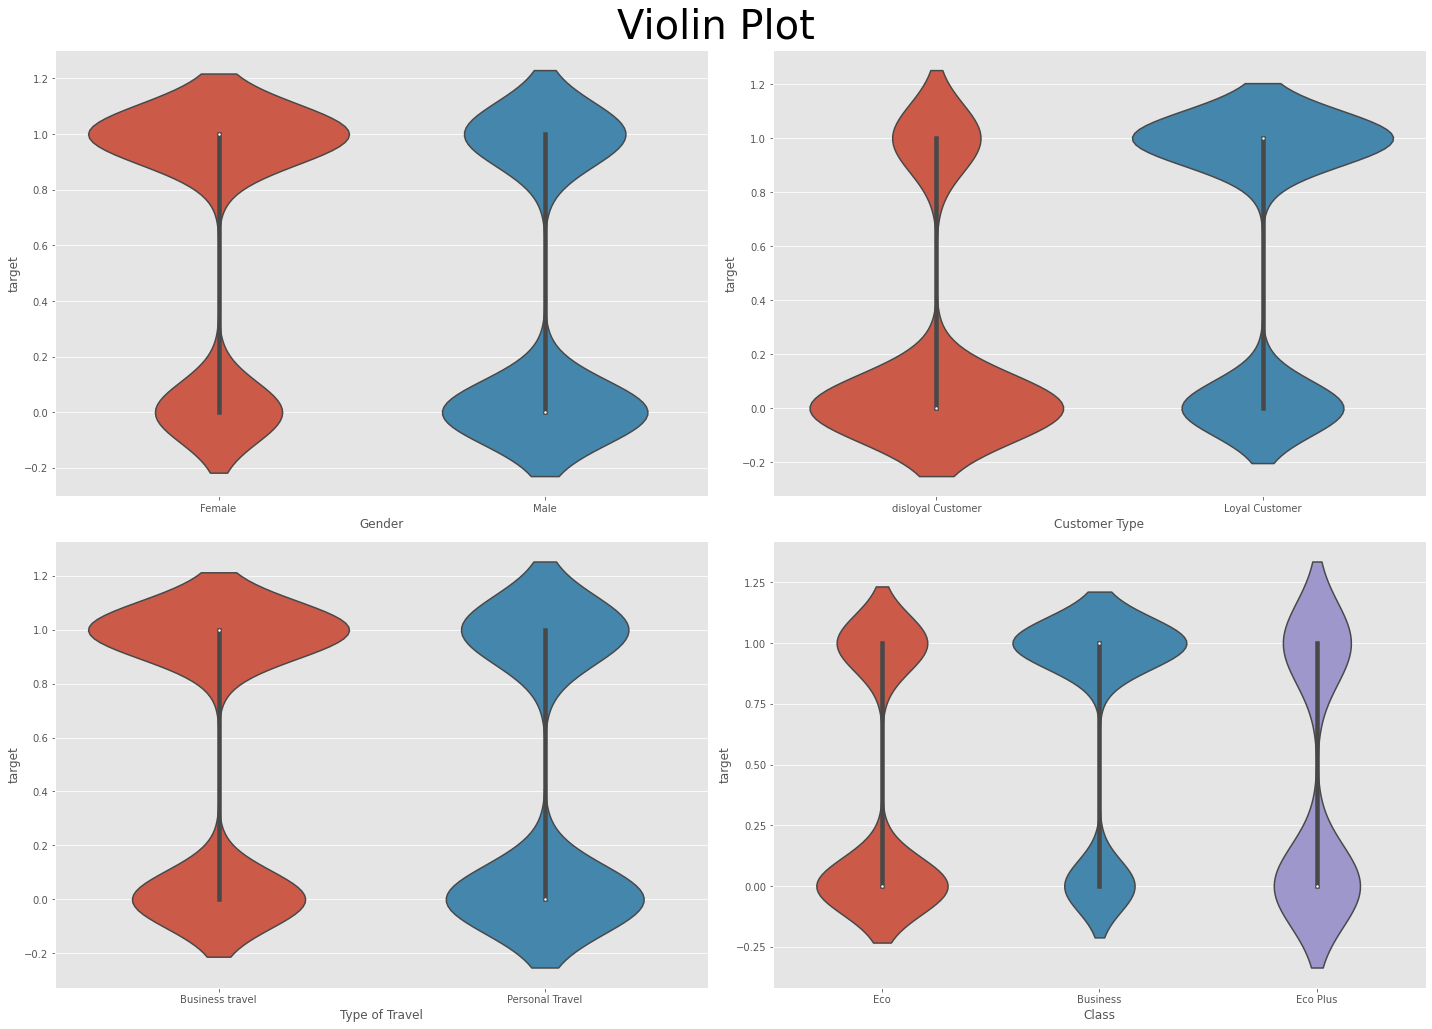

In [6]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[categorical_feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 수치형 데이터에 따른 target 분포 확인

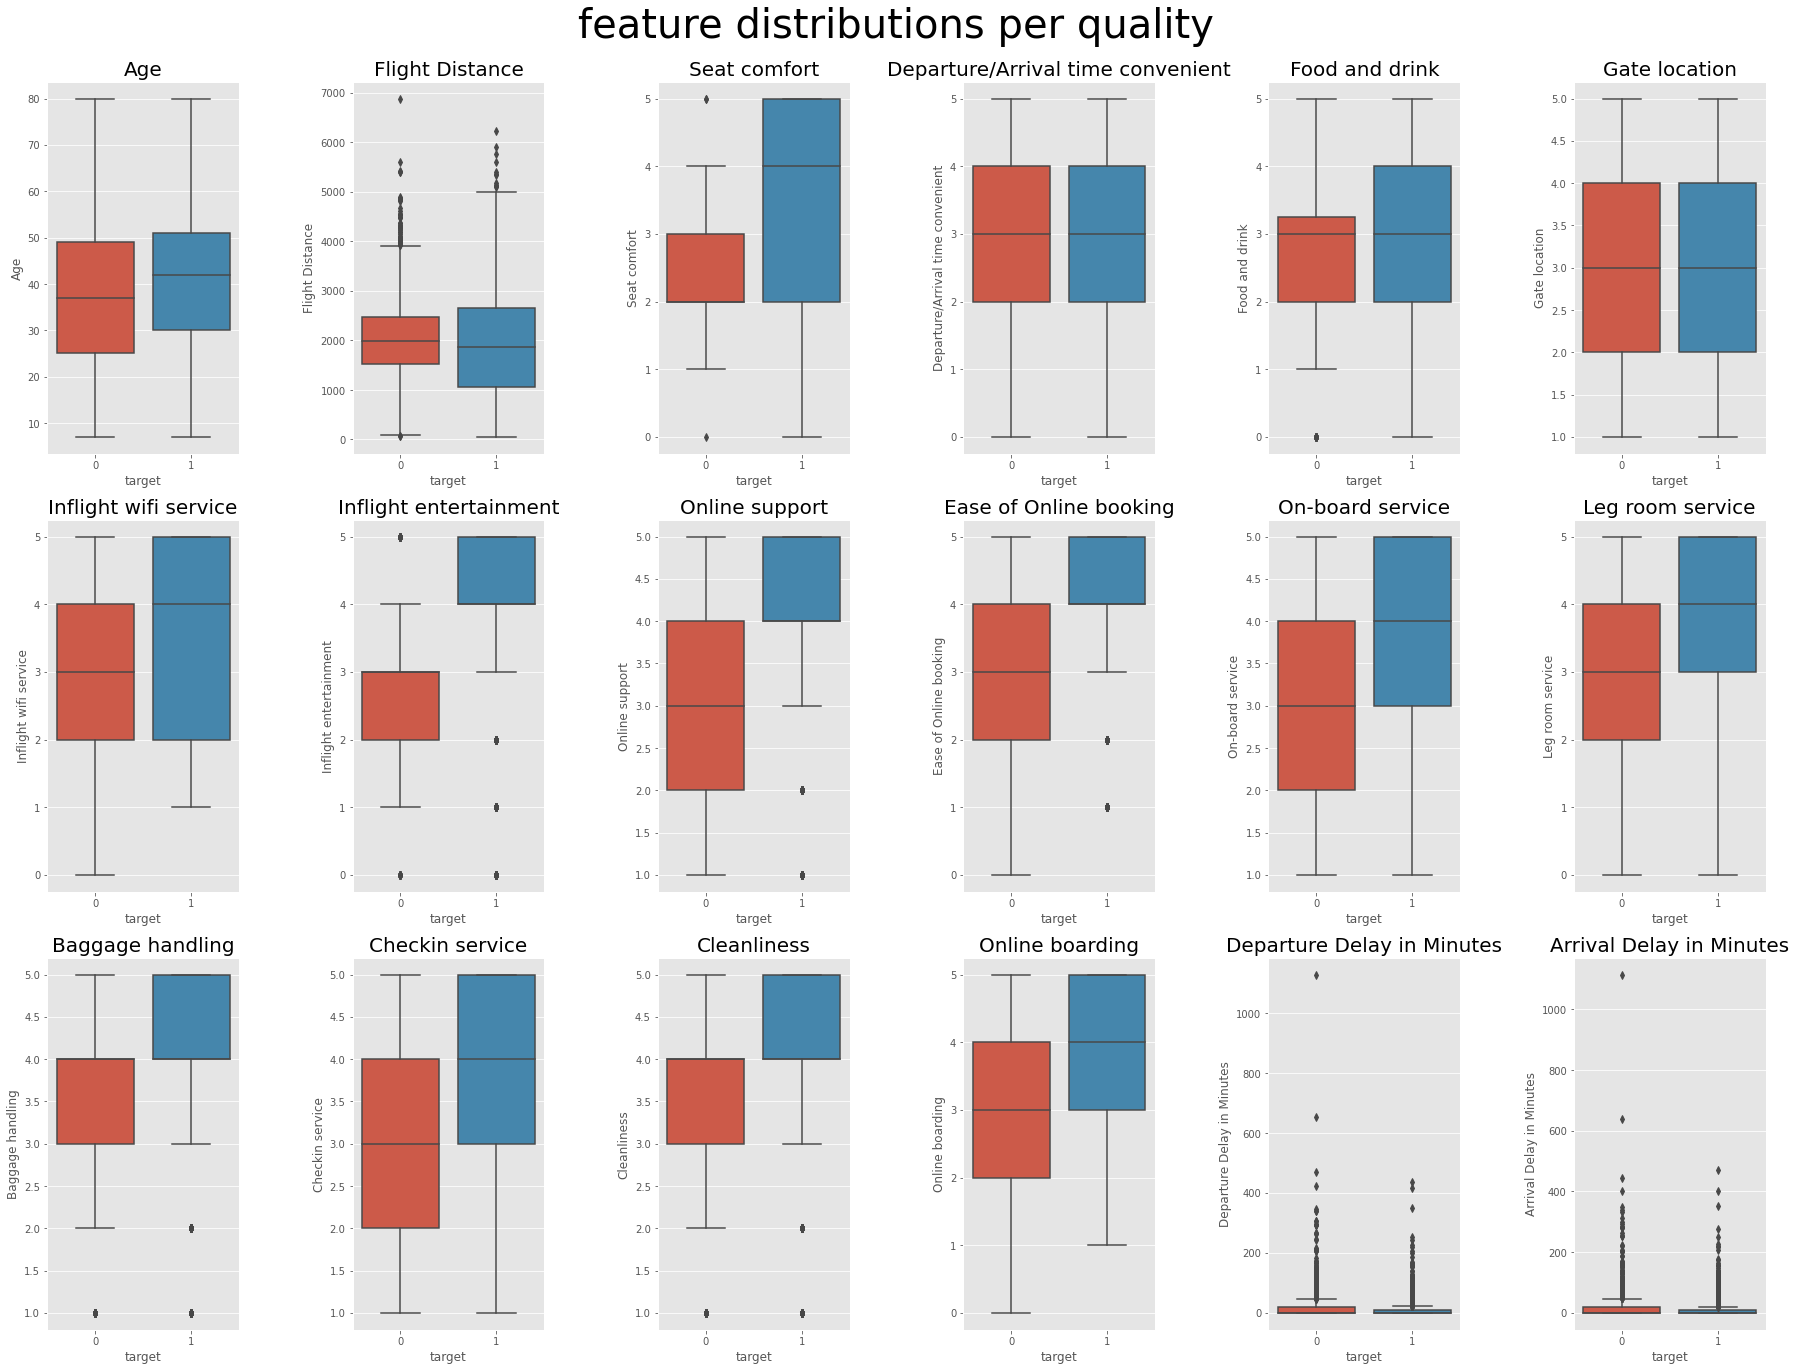

In [7]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]
num_data = num_data.drop(['id'], axis =1)

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# feature간 상관관계 히트맵 시각화

In [8]:
from sklearn.preprocessing import LabelEncoder

# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
corr_df = data.copy()
corr_df.drop(['id'], axis=1)
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
#dtypes=='O'에서 O는 objects를 의미

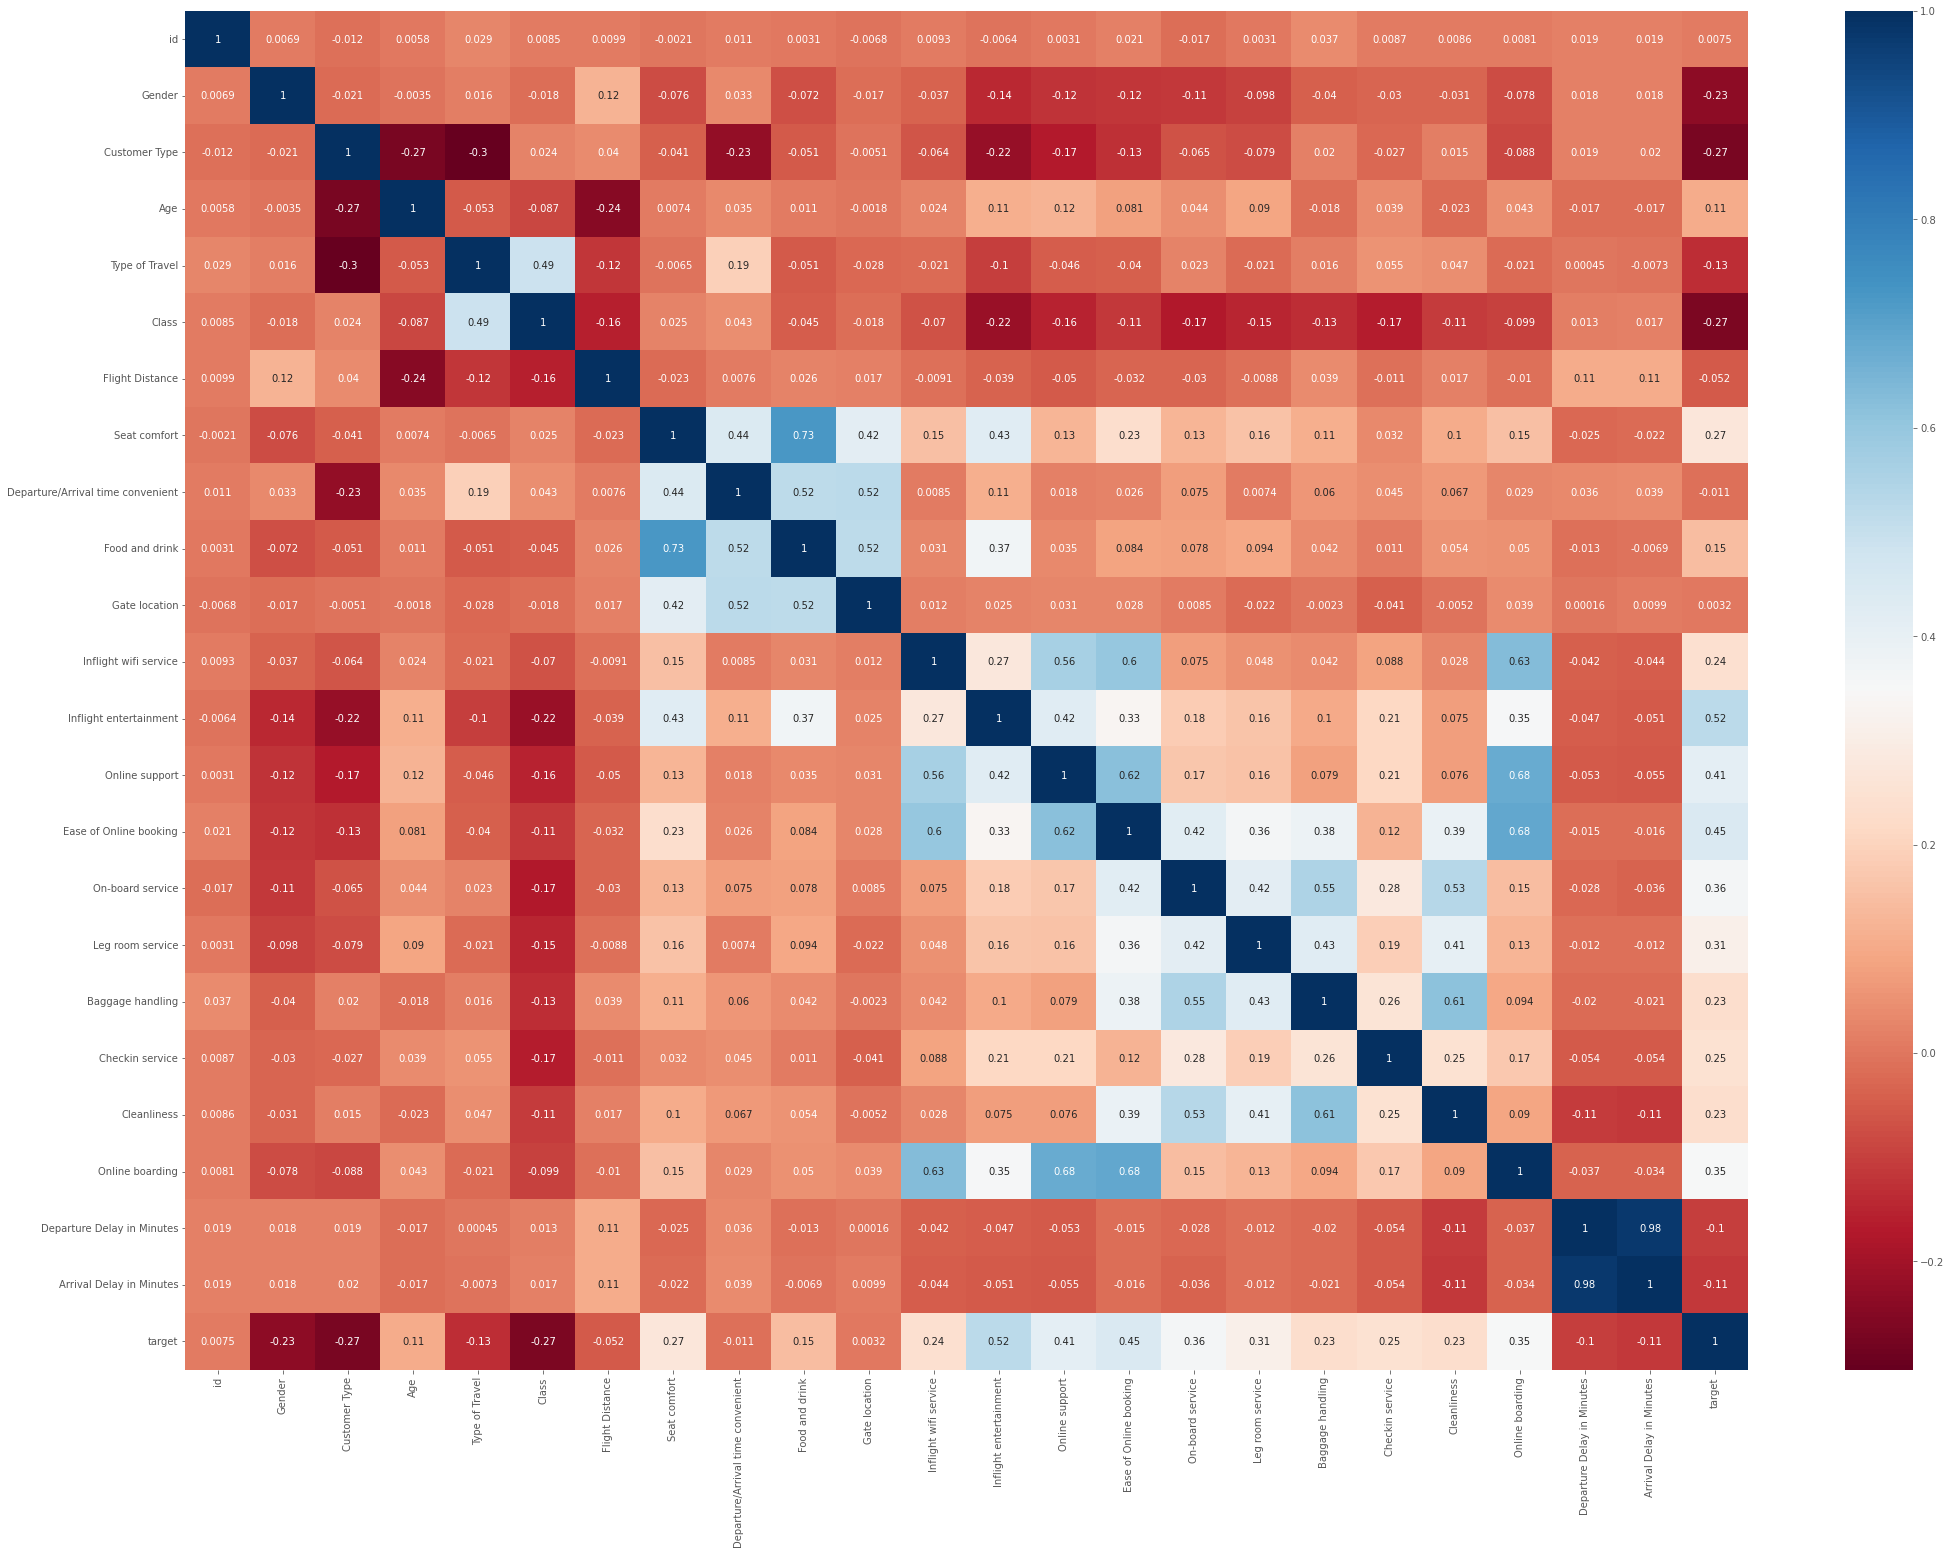

In [9]:
corr_df = corr_df.corr()

plt.figure(figsize=(35,25))
sns.heatmap(corr_df,
            annot=True, # 박스안 데이터 값 자동 입력
            cmap='RdBu'  # 색깔 테마 선택
       )

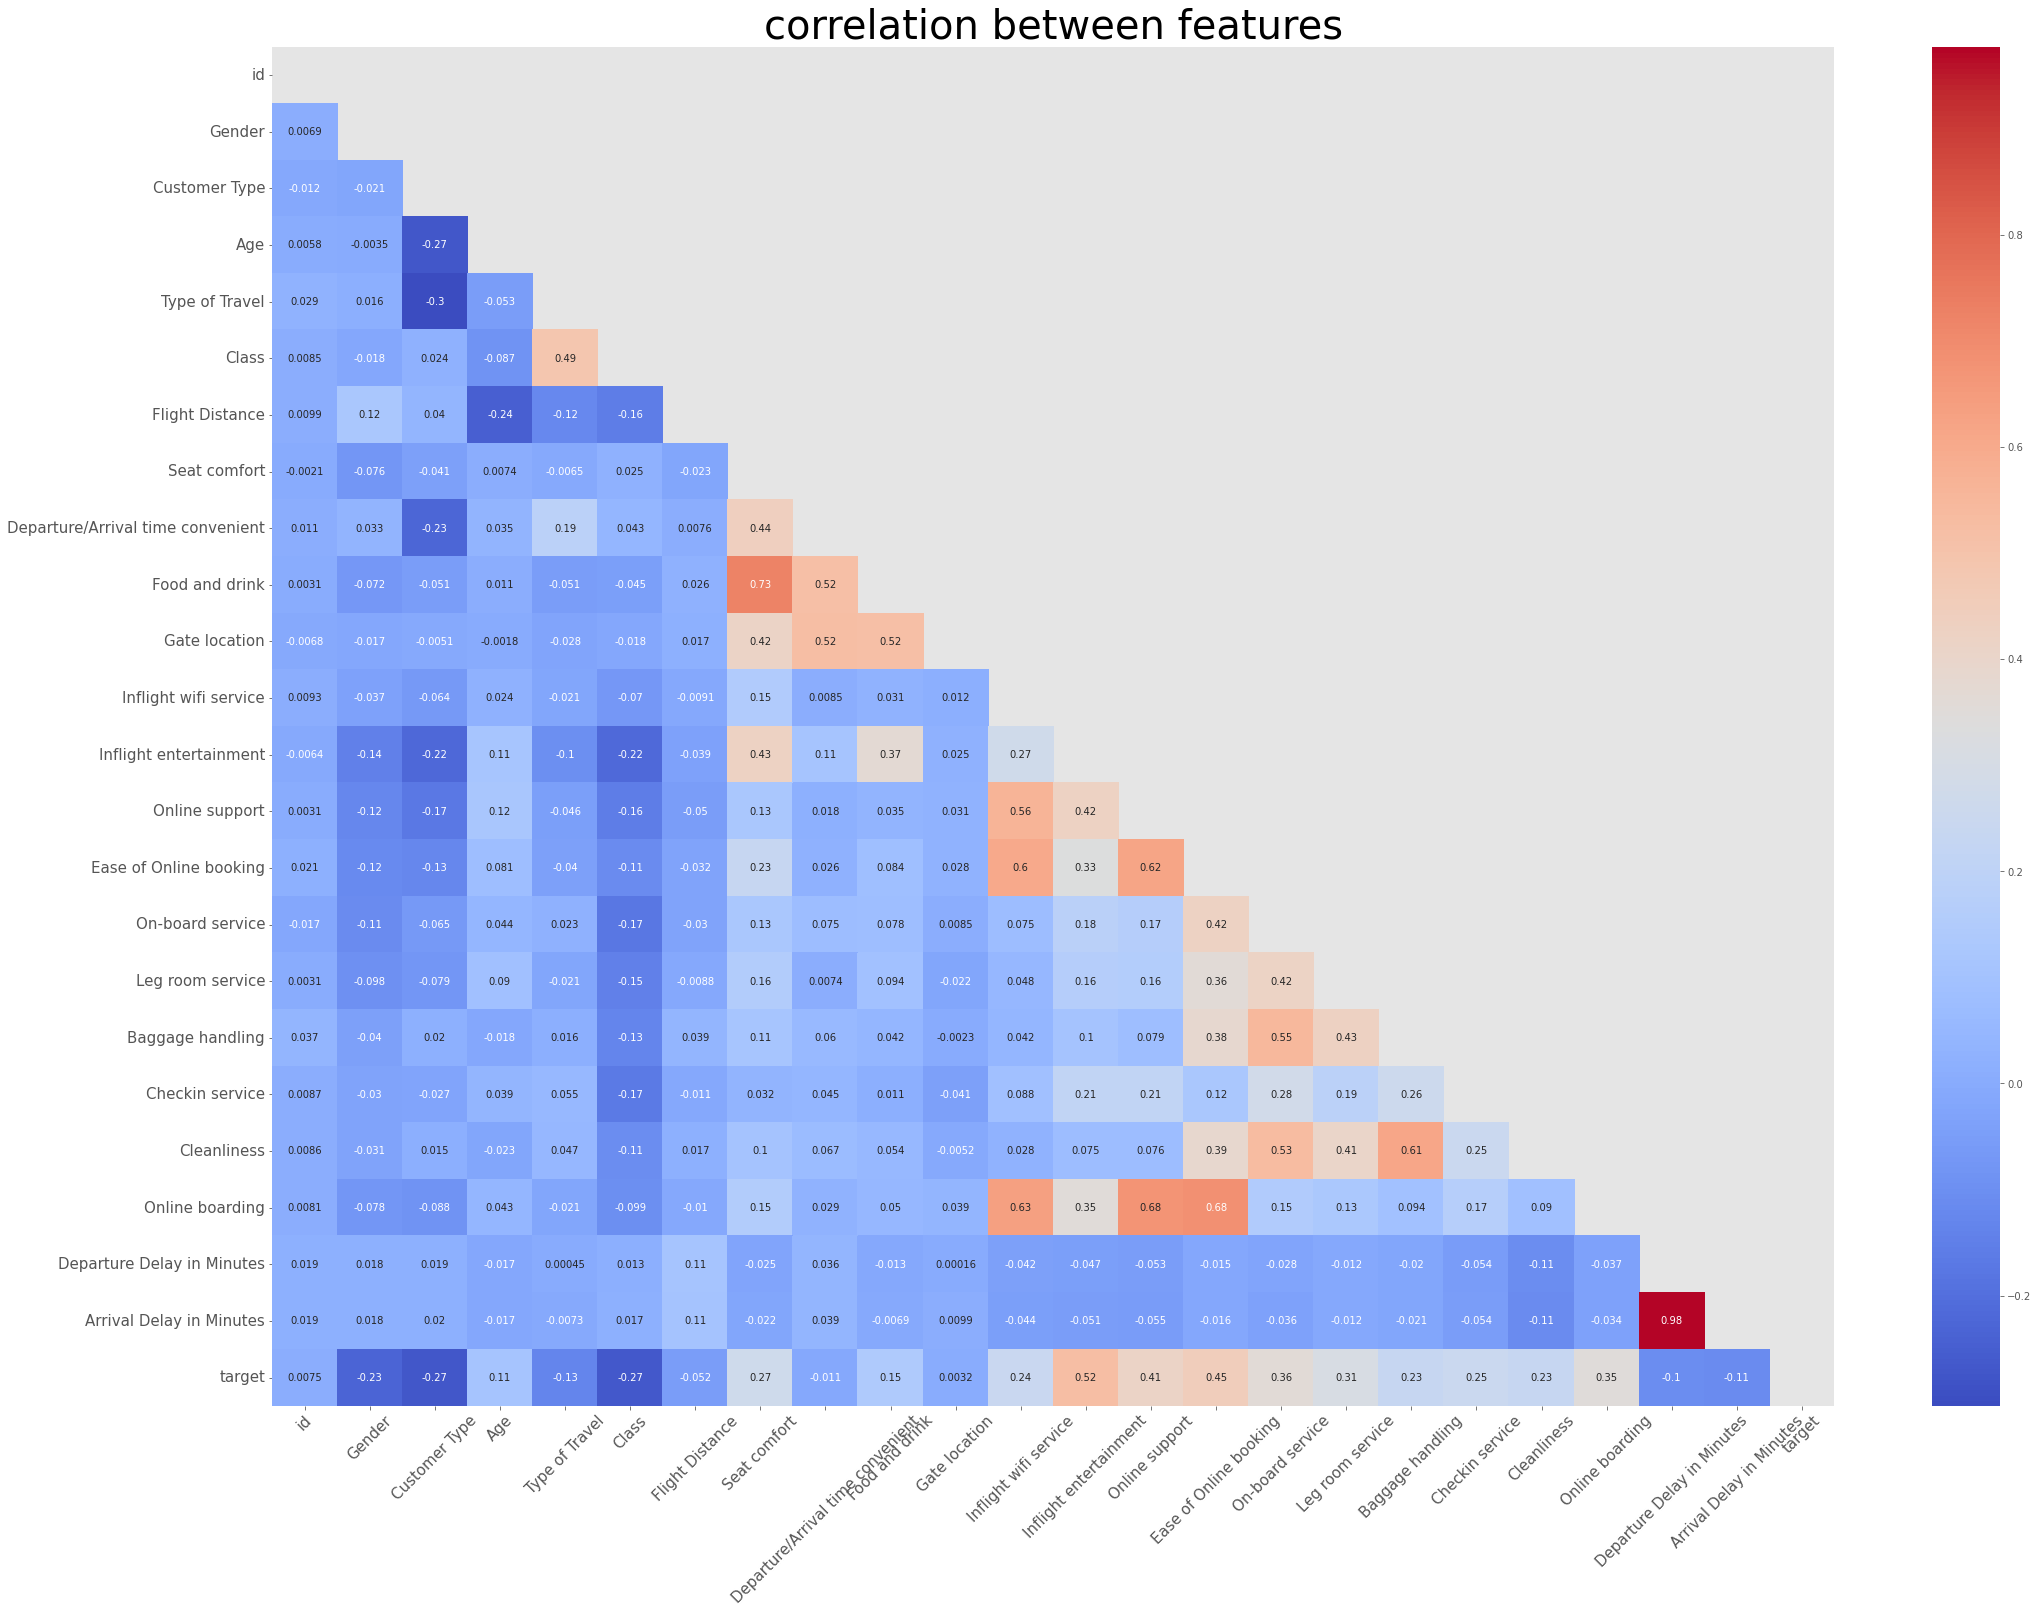

In [10]:
#상관관계 분석도
plt.figure(figsize=(35,25))

heat_table = corr_df
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()


# 데이터 불러오기

In [11]:
train = pd.read_csv('/content/data/train.csv')
submission = pd.read_csv('/content/data/sample_submission.csv')

train_x = train.drop(['id','target'], axis = 1)
train_y = train['target']

In [12]:
test = pd.read_csv("/content/data/test.csv")

test_x = test.drop(['id'],axis=1)

# 결측치 확인

In [13]:
train_x.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [14]:
train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [15]:
train_x.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

# 범주형 데이터 라벨인코딩을 위한 변수화

In [16]:
num_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt']
cat_features = ["Gender", "Customer Type","Type of Travel", "Class"]

numeric_feature = train_x.columns[(train_x.dtypes=='int64') | (train_x.dtypes=='float')]
categorical_feature = train_x.columns[train_x.dtypes=='object']

In [17]:
print(num_features)
print(numeric_feature)

['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt']
Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


In [18]:
print(categorical_feature)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')


# 범주형 데이터 라벨인코딩

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in categorical_feature:
    le = le.fit(train_x[feature])
    train_x[feature] = le.transform(train_x[feature])

# 수치형 데이터 정규화

In [20]:
#정규화를 위한 패키지를 불러옵니다.
from sklearn.preprocessing import MinMaxScaler

#수치형 데이터를 정규화 시켜줍니다.
scaler = MinMaxScaler()
train_x[numeric_feature] = scaler.fit_transform(train_x[numeric_feature])

In [21]:
#GridSearchCV 를 사용할 모델들을 호출합니다.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

#모델들을 할당할 리스트를 만들어줍니다.
estimators = []

#estimators 리스트에 모델들을 추가해줍니다.
rf = RandomForestRegressor()
estimators.append(rf)

gbr = GradientBoostingRegressor()
estimators.append(gbr)

etr = ExtraTreesRegressor()
estimators.append(etr)

#모들의 파라미터들을 할당할 리스트를 만들어줍니다.
params = []

# params 리스트에 성능을 비교하고자하는 파라미터들 추가해줍니다.
params_rf = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [1,2,3,4]}
params.append(params_rf)

params_gbr = {'loss' : ['huber', 'quantile'],
             'learning_rate':[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15],
             'n_estimators':[60,70,80,90,100,110,120,130,140,150]}
params.append(params_gbr)

params_etr = {'n_estimators' : [50,60,70,80,90,100,110,120,130,140,150]}
params.append(params_etr)

In [22]:
#GridSearchCV 를 이용해 모델들을 최적화시켜줍니다.
from tqdm.auto import tqdm
def gridSearchCV(models,params):
    best_models=[]
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i],n_jobs = -1, verbose=1, cv=5)
        model_grid.fit(train_x,train_y)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(estimators,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [23]:
best_model_list

[RandomForestRegressor(min_samples_split=4, n_estimators=120),
 GradientBoostingRegressor(learning_rate=0.14, loss='huber', n_estimators=150),
 ExtraTreesRegressor(n_estimators=70)]

# 하이퍼파라미터 튜닝

In [50]:
best_models = [
    ('rf', RandomForestRegressor(min_samples_split=4, n_estimators=120)),
    ('GBR', GradientBoostingRegressor(learning_rate=0.14, loss='huber', n_estimators=150)),
    ('ET', ExtraTreesRegressor(n_estimators=70))
]

#앙상블 기법을 위한 패키지를 불러옵니다.
from sklearn.ensemble import VotingRegressor

#앙상블 모델을 학습시켜줍니다.
voting_rg = VotingRegressor(estimators=best_models)
voting_rg.fit(train_x,train_y)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(min_samples_split=4,
                                                   n_estimators=120)),
                            ('GBR',
                             GradientBoostingRegressor(learning_rate=0.14,
                                                       loss='huber',
                                                       n_estimators=150)),
                            ('ET', ExtraTreesRegressor(n_estimators=70))])

In [25]:
# categorical_feature = ['Gender', 'Customer Type','Type of Travel','Class']
# numeric_feature = ['Age','Flight Distance','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']

In [53]:
test = pd.read_csv("/content/data/test.csv")

test_x = test.drop("id",axis=1)

In [55]:
for feature in categorical_feature:
    test_x[feature] = le.transform(test_x[feature]) #y contains previously unseen labels 오류 발생

test_x[numeric_feature] = scaler.transform(test_x[numeric_feature]) #수치형 데이터 정규화는 정상 작동

In [29]:
# numeric_feature = test_x.columns[(test_x.dtypes=='int64') | (test_x.dtypes=='float')]
# categorical_feature = train_x.columns[train_x.dtypes=='object']

In [57]:
test_x['Gender'] = test_x['Gender'].map({'Female':0, 'Male':1})

In [58]:
test_x['Customer Type'] = test_x['Customer Type'].map({'Loyal Customer':0, 'disloyal Customer':1})

In [59]:
test_x['Type of Travel'] = test_x['Type of Travel'].map({'Personal Travel':1, 'Business travel':0})

In [60]:
test_x['Class'] = test_x['Class'].map({'Eco Plus':2, 'Eco':1, 'Business':0})

In [61]:
test_x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0.739726,1,1,0.290630,0.2,0.2,0.2,0.00,0.6,1.0,1.00,1.0,1.00,1.0,1.00,0.50,1.00,0.6,0.045213,0.052018
1,0,1,0.273973,0,0,0.262665,0.2,0.2,0.2,0.75,0.2,0.2,0.00,0.2,0.50,0.8,1.00,0.75,0.75,0.2,0.000000,0.000000
2,0,0,0.616438,0,0,0.229868,0.8,0.8,0.8,0.75,0.8,0.6,0.75,1.0,1.00,1.0,1.00,0.75,1.00,0.6,0.000000,0.000000
3,1,0,0.643836,0,0,0.509810,0.8,0.8,0.8,0.75,1.0,0.8,1.00,0.4,0.25,0.4,0.25,1.00,0.25,0.2,0.000000,0.000000
4,0,0,0.465753,0,1,0.207760,0.8,0.6,0.6,0.50,0.8,0.8,0.75,0.8,0.50,0.2,0.25,1.00,0.75,0.8,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0.753425,0,2,0.000293,0.6,0.2,0.2,0.00,0.8,0.6,0.75,0.6,0.50,0.6,0.50,0.50,0.50,0.2,0.000000,0.000000
1996,0,0,0.356164,0,0,0.275988,0.8,0.8,0.8,0.75,0.6,1.0,1.00,1.0,1.00,1.0,1.00,0.00,1.00,0.6,0.084220,0.088789
1997,1,0,0.301370,0,1,0.343485,0.6,1.0,0.8,0.75,0.6,0.6,0.50,0.6,0.00,0.4,0.50,0.75,0.25,0.6,0.000000,0.002691
1998,0,0,0.602740,1,0,0.051830,1.0,0.4,1.0,0.75,0.8,0.6,0.50,0.4,0.25,1.0,0.25,0.25,0.25,0.4,0.077128,0.074439


In [64]:
sample_submission = pd.read_csv('/content/data/sample_submission.csv')

In [67]:
predictions = voting_rg.predict(test_x)

sample_submission.target = predictions
sample_submission.to_csv("submission.csv",index = False)

In [ ]:
submission_0['target'] = submission_0['target'].map({'Loyal Customer':0, 'disloyal Customer':1})

In [ ]:
submission_0[(submission['target'] < 0.5)] = 0
submission_0[(submission['target'] > 0.5)] = 1

In [ ]:
submission_0['target'] = submission_0['target'].apply(lambda x : 1 if (x>0.5) else 0)

In [ ]:
submission_0.to_csv("submission_0.csv",index = False)